In [1]:
import numpy as np
from sklearn.datasets import make_blobs, make_biclusters
import matplotlib.pyplot as plt
from matplotlib.cm import autumn

from utils import cmap_bold, plot_data

/home/alperen/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/alperen/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/alperen/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/alperen/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


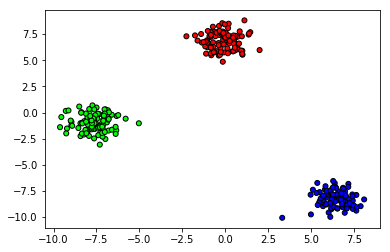

In [2]:
K = 3
X, y = make_blobs(n_samples=300, centers=K, cluster_std=0.8)
plot_data(X, y)

In [3]:
class KMeans:
    def __init__(self, k=3, max_iter=10):
        self.k = k
        self.max_iter = max_iter

    def init_centroids(self, X):
        m, n = X.shape
        idx = np.random.permutation(m)
        self.centroids = X[idx[:self.k], :]
    
    def fit(self, X):
        self.init_centroids(X)
        
    def predict(self, X):
        self.find_centroids(X)
        return self.centroids
    
    def find_closest(self, X):
        m, n = X.shape
        idx = np.zeros((m, 1))
        for i in range(m):
            index = 0
            init_dist = np.sum((X[i, :] - self.centroids[0, :]) ** 2)
            for j, centroid in enumerate(self.centroids[1:], 1):
                current_dist = np.sum((X[i, :] - centroid) ** 2)
                if current_dist <= init_dist:
                    index = j
                    init_dist = current_dist
                idx[i, :] = index

        return idx
    
    def compute_centroids(self, X, idx):
        m, n = X.shape
        # centroids = np.zeros((self.k, n))
        for i in range(self.k):
            self.centroids[i, :] = np.mean(X[idx[:, 0] == i, :], axis=0)
        # return centroids

    def find_centroids(self, X):
        for i in range(self.max_iter):
            idx = self.find_closest(X)
            self.compute_centroids(X, idx)

In [4]:
kmeans = KMeans()
kmeans.fit(X)

_centroids = kmeans.predict(X)

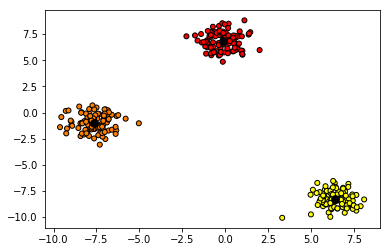

In [5]:
plot_data(X, y, cmap=autumn)
plt.scatter(_centroids[:, 0], _centroids[:, 1], c='black', s=60)

In [6]:
# Sklearn way
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=K)
kmeans.fit(X)

preds = kmeans.predict(X)
print(kmeans.cluster_centers_)

[[-7.62341503 -0.9702174 ]
 [ 6.41529598 -8.2757526 ]
 [-0.1342986   6.84866294]]


/home/alperen/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


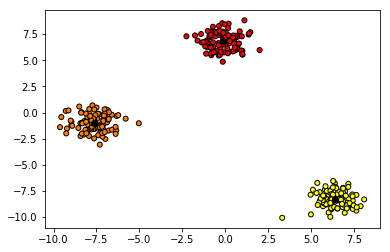

In [7]:
plot_data(X, y, cmap=autumn)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black')
plt.show()